In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [2]:
df=pd.read_csv(r'C:\Users\Hewlett-Packard\Downloads\Python_Diwali_Sales_Analysis\Python_Diwali_Sales_Analysis\Diwali Sales Data.csv',encoding='unicode_escape')

In [3]:
df.shape

(11251, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [5]:
df.drop(['Status','unnamed1'], axis=1,inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [7]:
pd.isnull(df)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,False,False,False,False,False,False,False,False,False,False,False,False,False
11247,False,False,False,False,False,False,False,False,False,False,False,False,False
11248,False,False,False,False,False,False,False,False,False,False,False,False,False
11249,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
df.shape

(11239, 13)

In [11]:
pd.isnull(df).sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [12]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610858
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355869
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


# Exploratory Data Analysis

### Gender 

In [13]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

<Axes: xlabel='Gender', ylabel='count'>

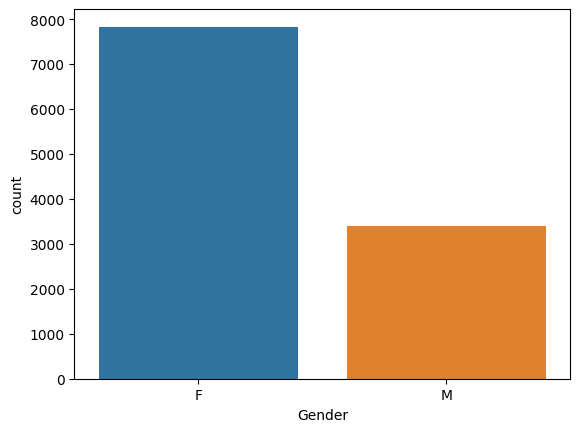

In [14]:
sns.countplot(x='Gender', data=df)

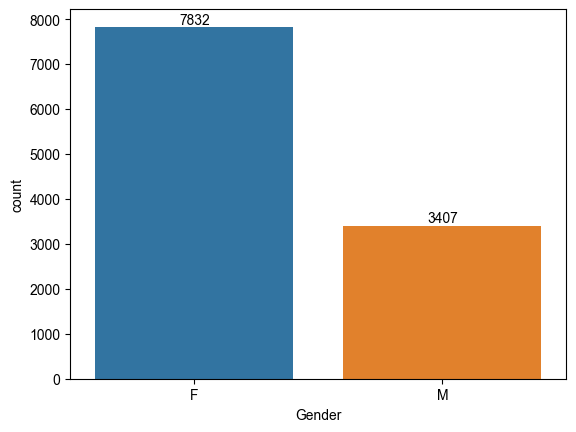

In [15]:
ax=sns.countplot(x='Gender',data=df)
for bar in ax.containers:
    ax.bar_label(bar)
sns.set(rc={'figure.figsize':(7,6)})

In [16]:
df.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

,Gender,Amount
0,F,74335856.43
1,M,31913276.00


<Axes: xlabel='Gender', ylabel='Amount'>

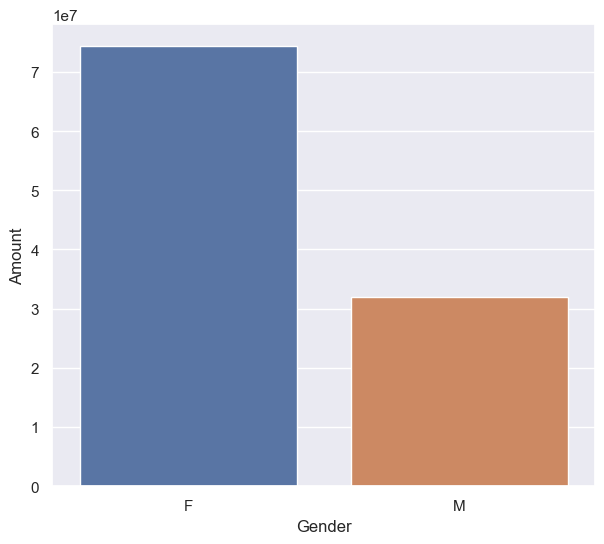

In [17]:
sales_gen=df.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(x='Gender', y='Amount', data=sales_gen)


#### From the above graph we can see that most of the buyers are Female even the purchesing power of female greater than male.

### AGE

In [18]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

<Axes: xlabel='Age Group', ylabel='count'>

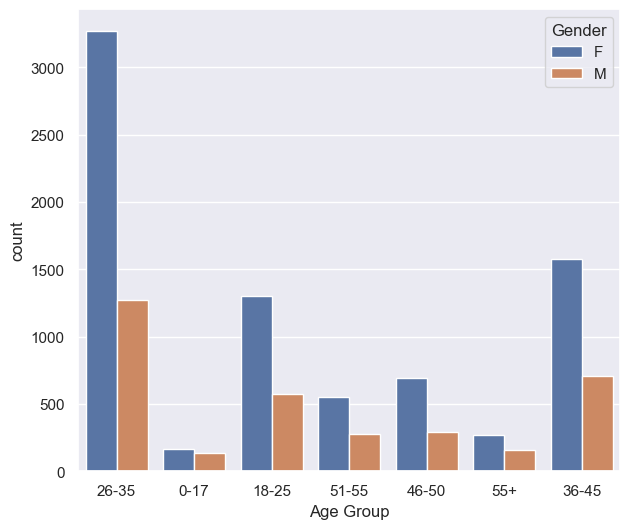

In [19]:
sns.countplot(data=df,x='Age Group',hue='Gender')

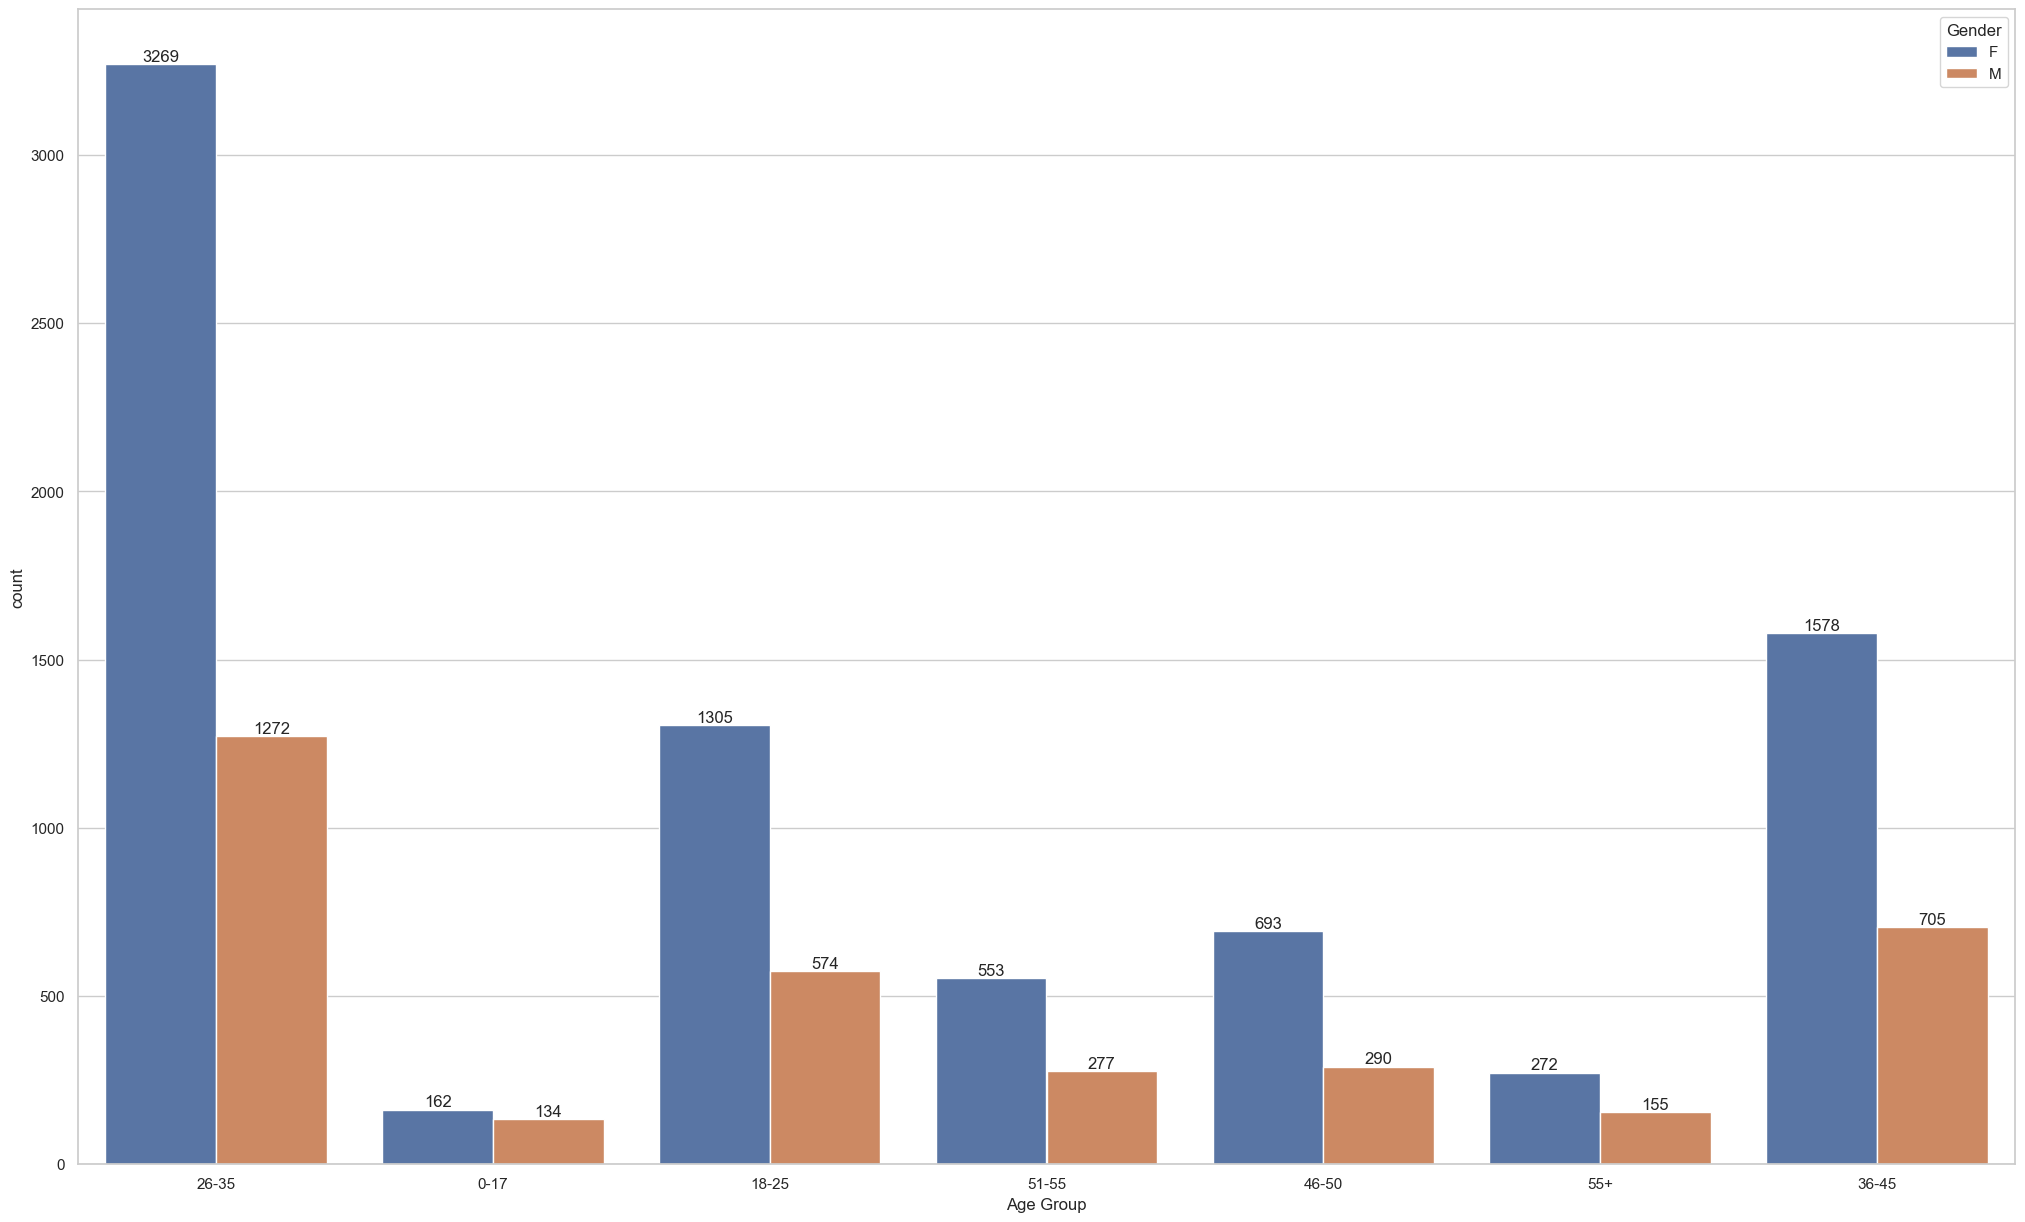

In [39]:
ax= sns.countplot(data=df,x='Age Group', hue='Gender')

for bars in ax.containers:
    ax.bar_label(bars)

In [21]:
sales_age=df.groupby(['Age Group'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

<Axes: xlabel='Age Group', ylabel='Amount'>

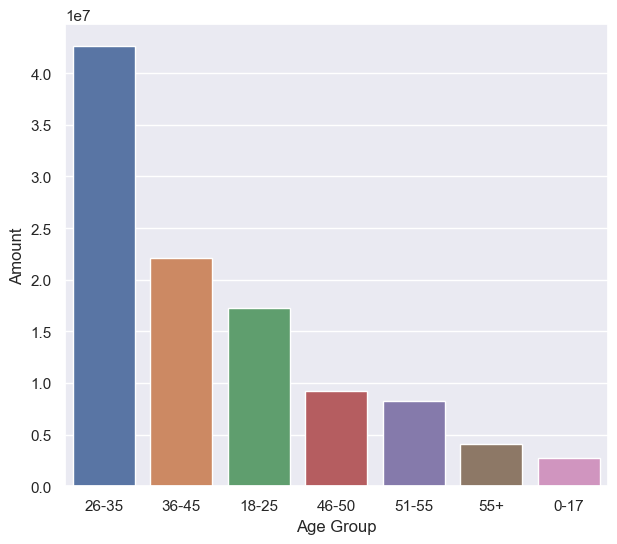

In [22]:
sns.barplot(x='Age Group', y='Amount' , data=sales_age)

#### from the above two graph we can see that age group 26-35 yr female is high buyers than others.

### State 

In [23]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [24]:
state_sales=df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

<Axes: xlabel='State', ylabel='Orders'>

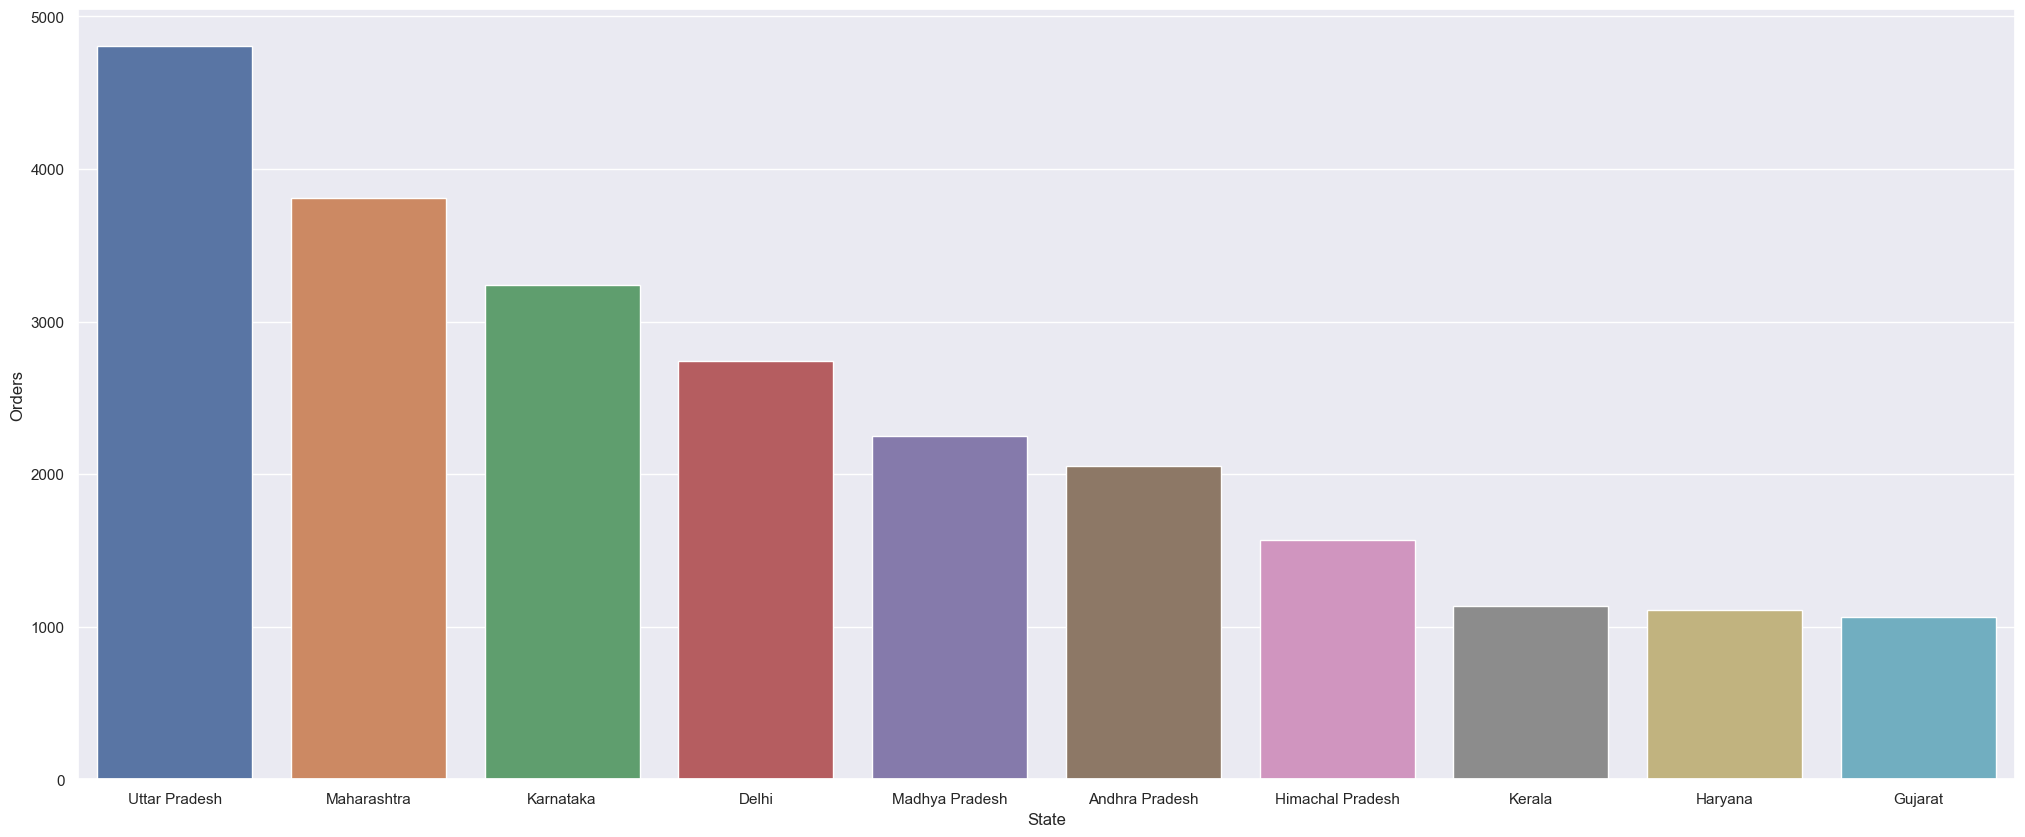

In [25]:
sns.set(rc={'figure.figsize':(25,10)})
sns.barplot(data=state_sales, x='State',y='Orders')

<Axes: xlabel='State', ylabel='Amount'>

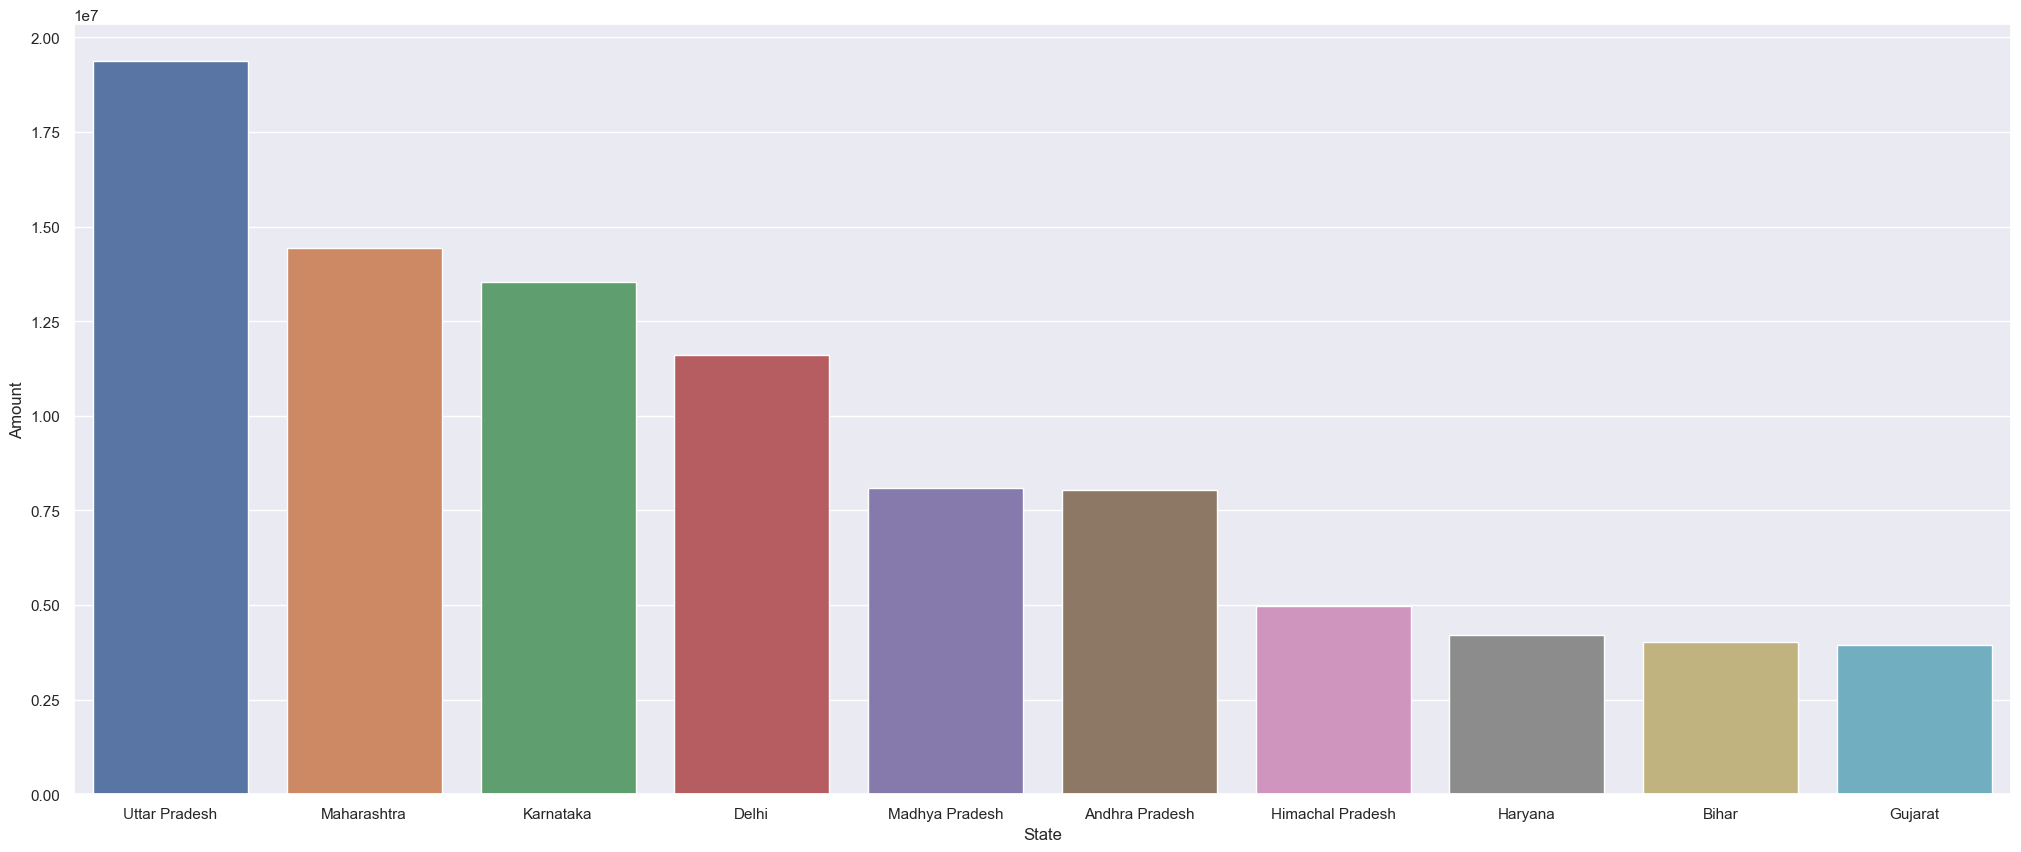

In [26]:
state1_sales=df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
sns.set(rc={'figure.figsize':(25,10)})
sns.barplot(data=state1_sales, x='State',y='Amount')



* from the above graphs we can see that most of the oreders and sales are from up, maharashtra and karnataka state.

## Marital Status

In [27]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

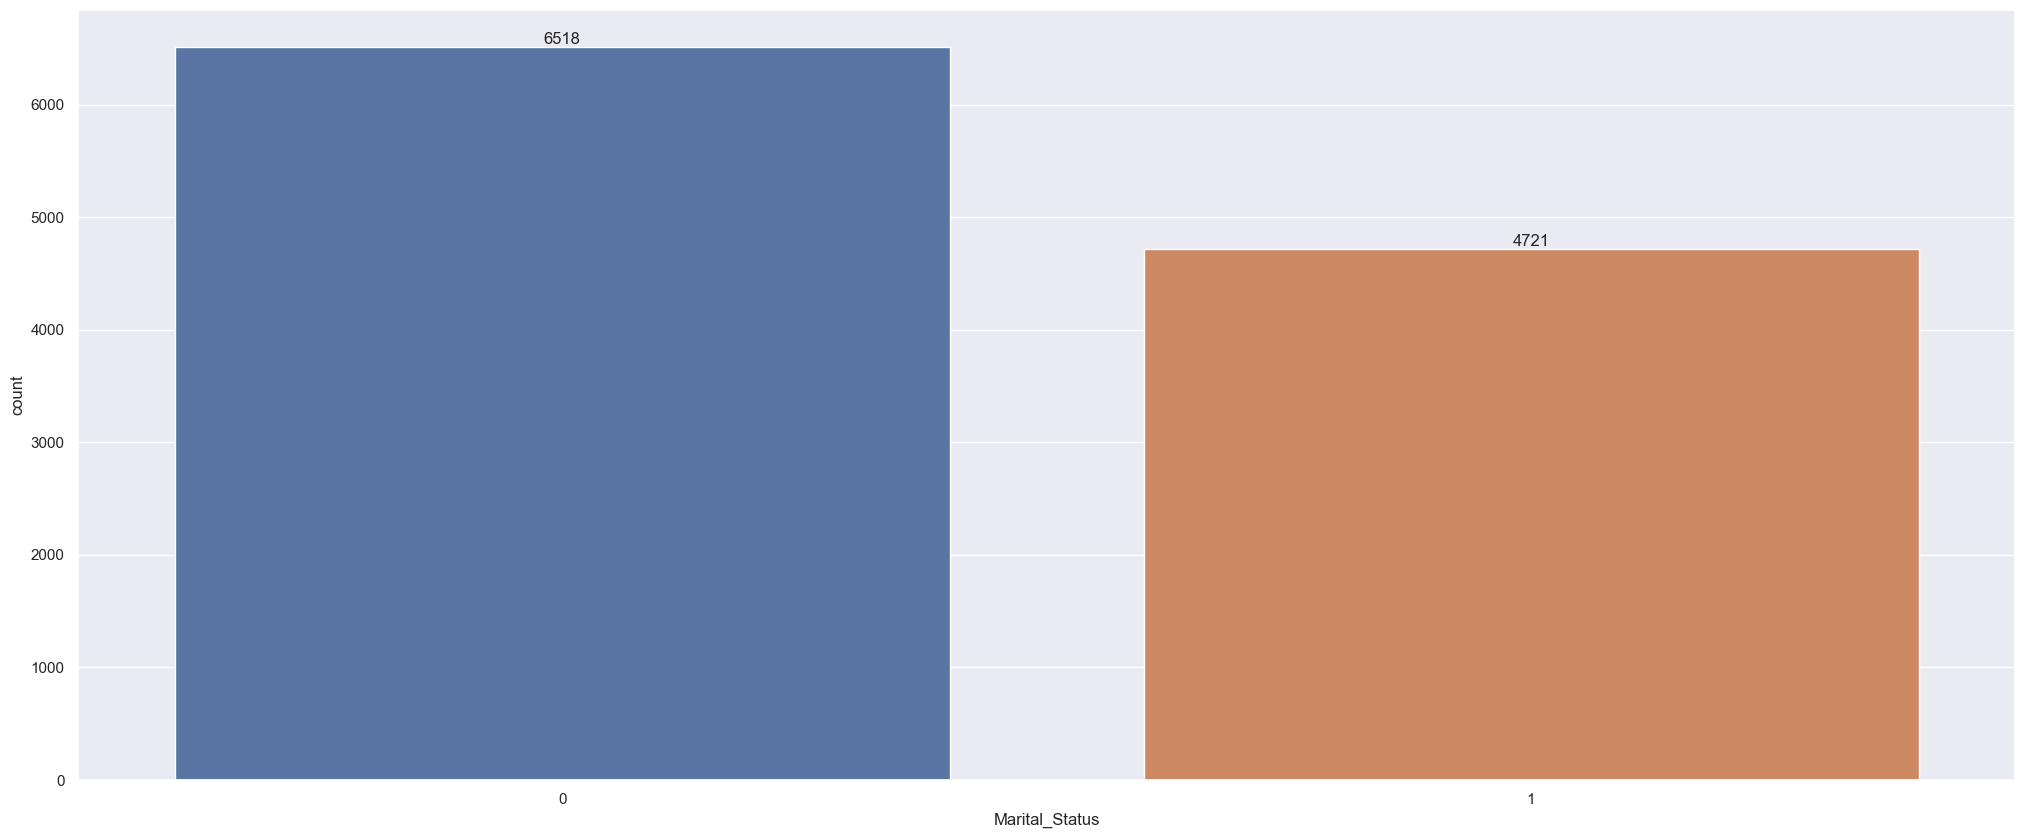

In [28]:
ax=sns.countplot(data=df, x='Marital_Status')
sns.set(rc={'figure.figsize':(7,5)})
for bars in ax.containers:
    ax.bar_label(bars)


<Axes: xlabel='Marital_Status', ylabel='Amount'>

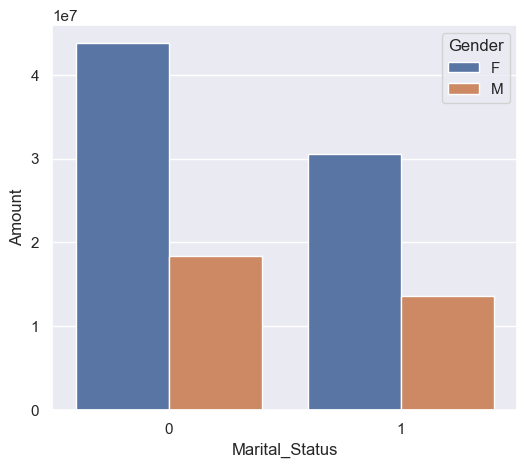

In [56]:
sales2_state=df.groupby(['Marital_Status', 'Gender'], as_index=False) ['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(data=sales2_state, x='Marital_Status', y='Amount', hue='Gender')

* from above graph we can see that most of buyer's is Married women and they have high purchasing power.

## occupations

In [30]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

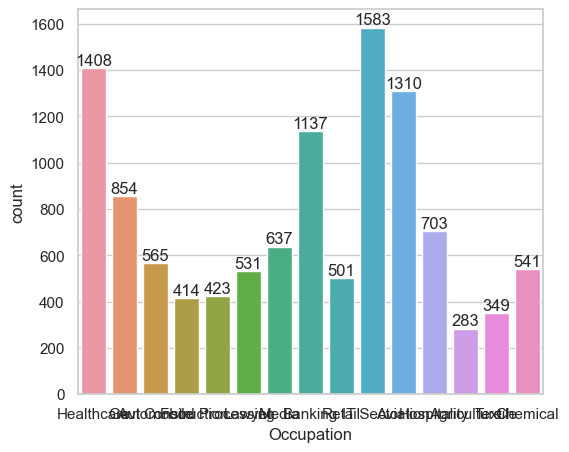

In [49]:
ax=sns.countplot(data=df, x='Occupation')
for bars in ax.containers:
    ax.bar_label(bars)
sns.set(rc={'figure.figsize':(25,7)})

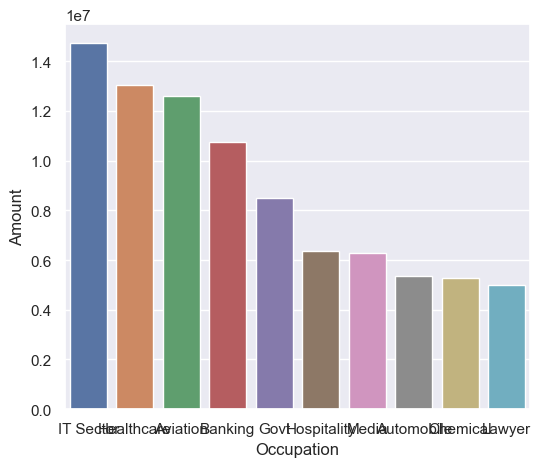

In [57]:
sales_state2=df.groupby(['Occupation'], as_index=False) ['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
sns.barplot(data =sales_state2, x='Occupation',y='Amount')
sns.set(rc={'figure.figsize':(25,7)})

* From the grophs we can see that motst of the buyer from IT sector and Healthcare sector.

## Product Category

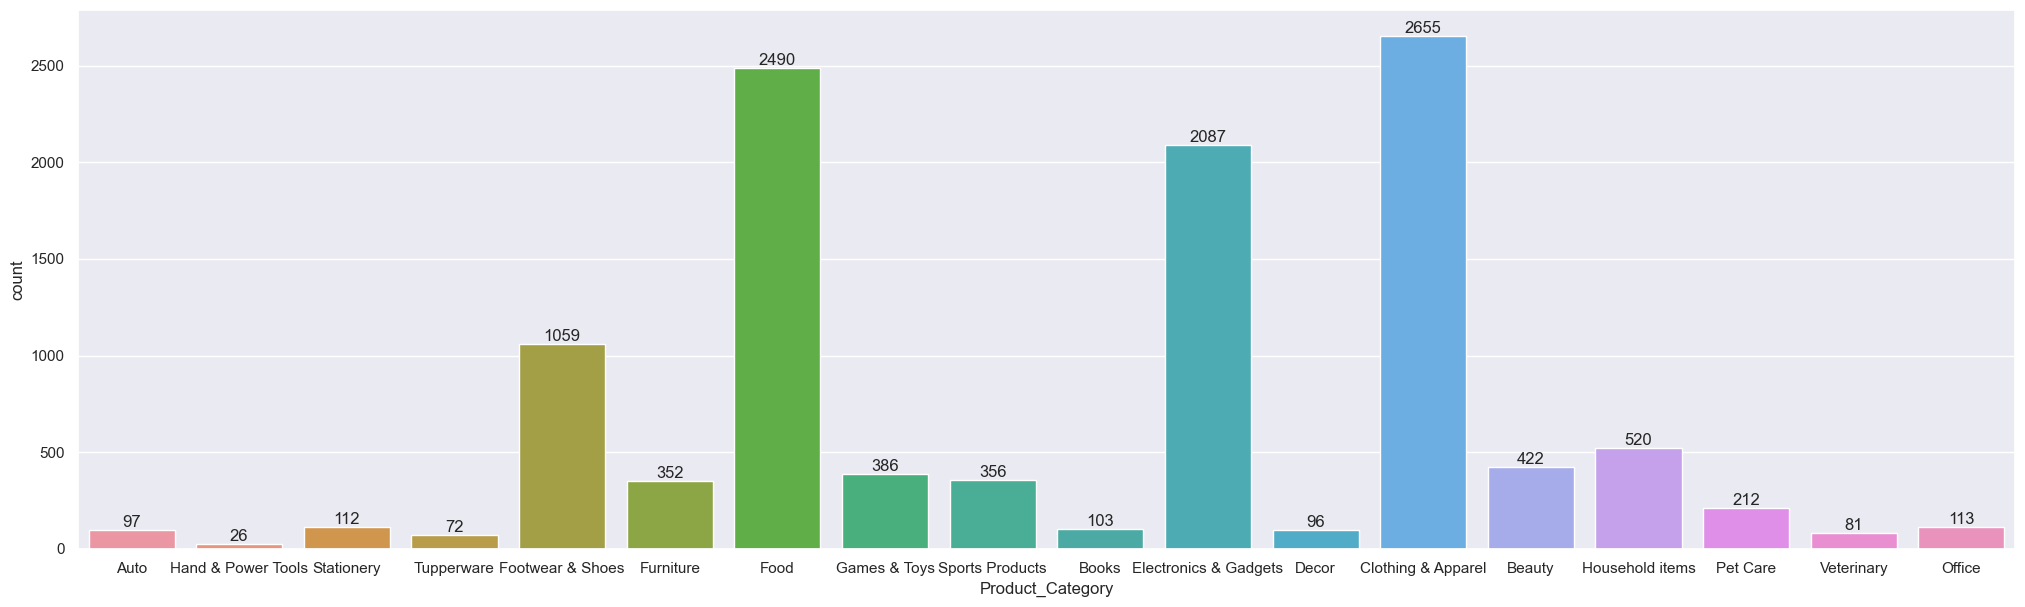

In [33]:
ax=sns.countplot(data=df, x='Product_Category')
for bars in ax.containers:
    ax.bar_label(bars)
sns.set(rc={'figure.figsize':(20,5)})

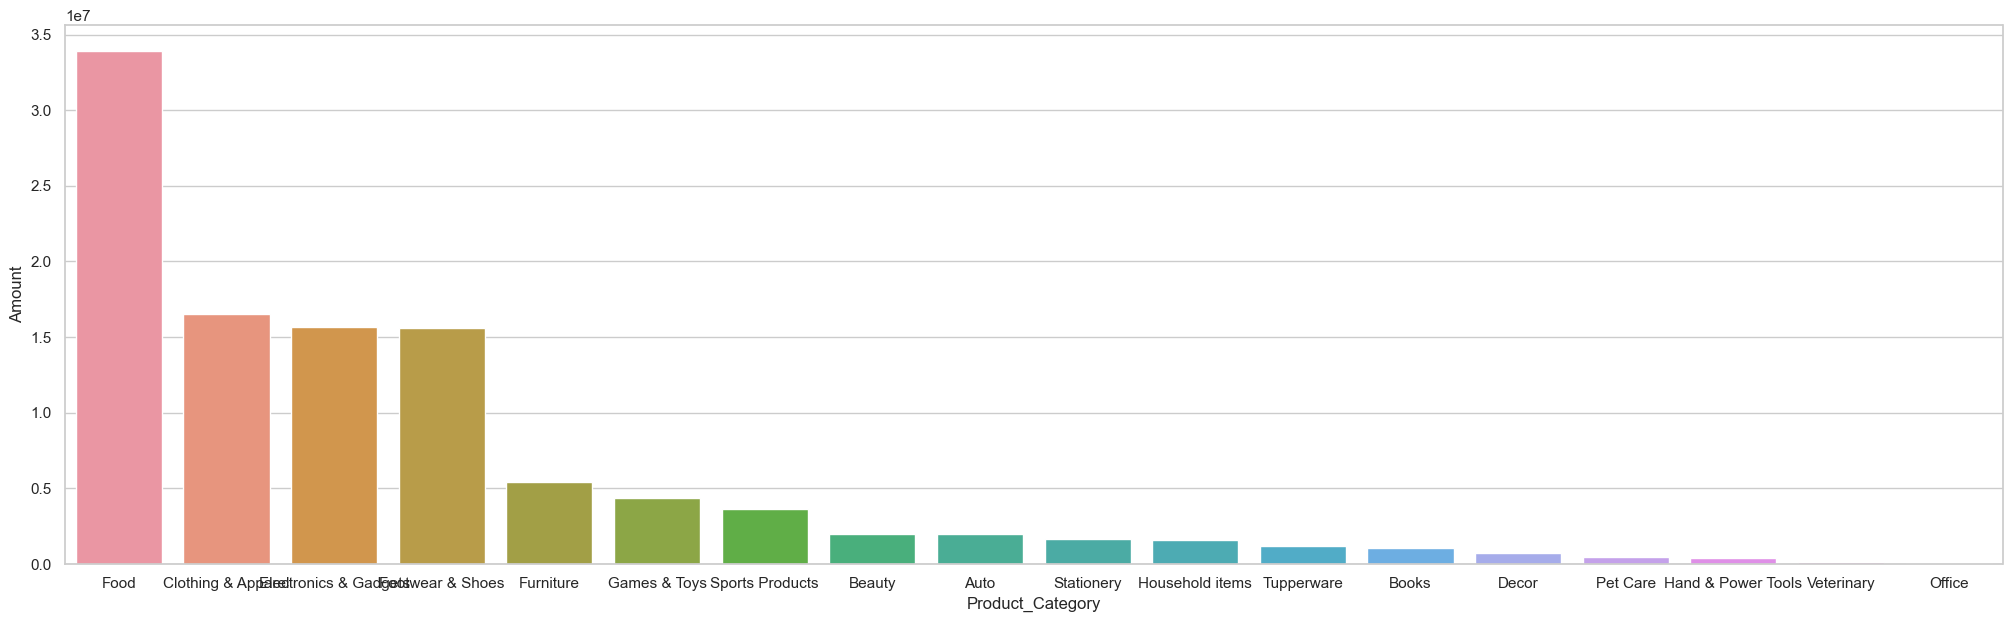

In [65]:
sales_state3=df.groupby(['Product_Category'],as_index=False) ['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.barplot(data=sales_state3, x='Product_Category', y='Amount')
sns.set(rc={'figure.figsize':(25,15)})

* from the above graphs we can see that most of sold products are Food, Apparel and Electronics

<Axes: xlabel='Product_ID', ylabel='Orders'>

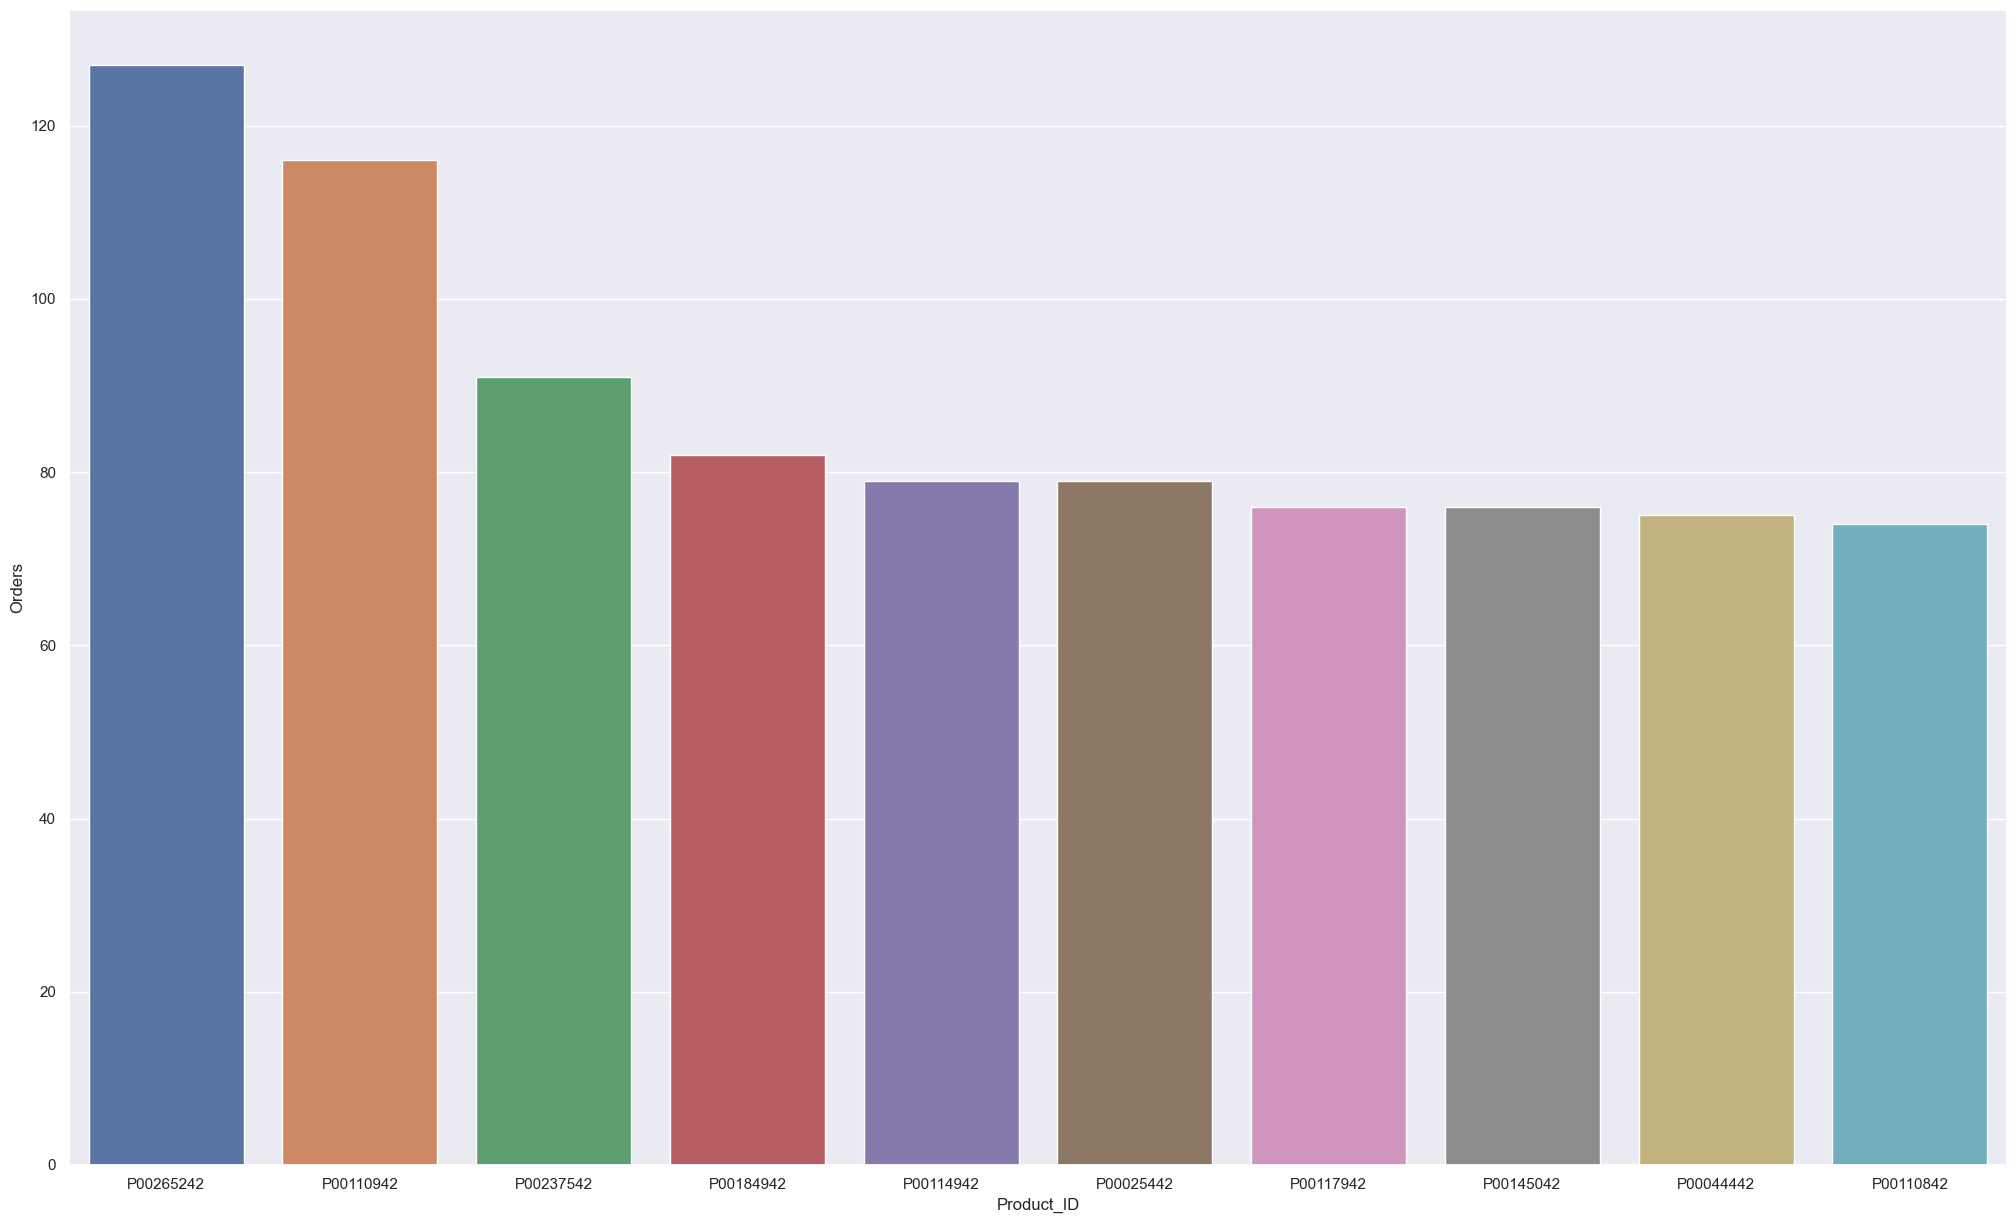

In [35]:
sales_state=df.groupby(['Product_ID'],as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)
sns.barplot(data=sales_state, x='Product_ID', y='Orders')


## Conclusion :

* Married women age group of 26-35 from Up, Maharashtra and Karnatka in IT sector, Healthcare sector and Aviation are more likely to buy product from Food, Clothing and Electronics category.

# DashBoard of Overall Analysis

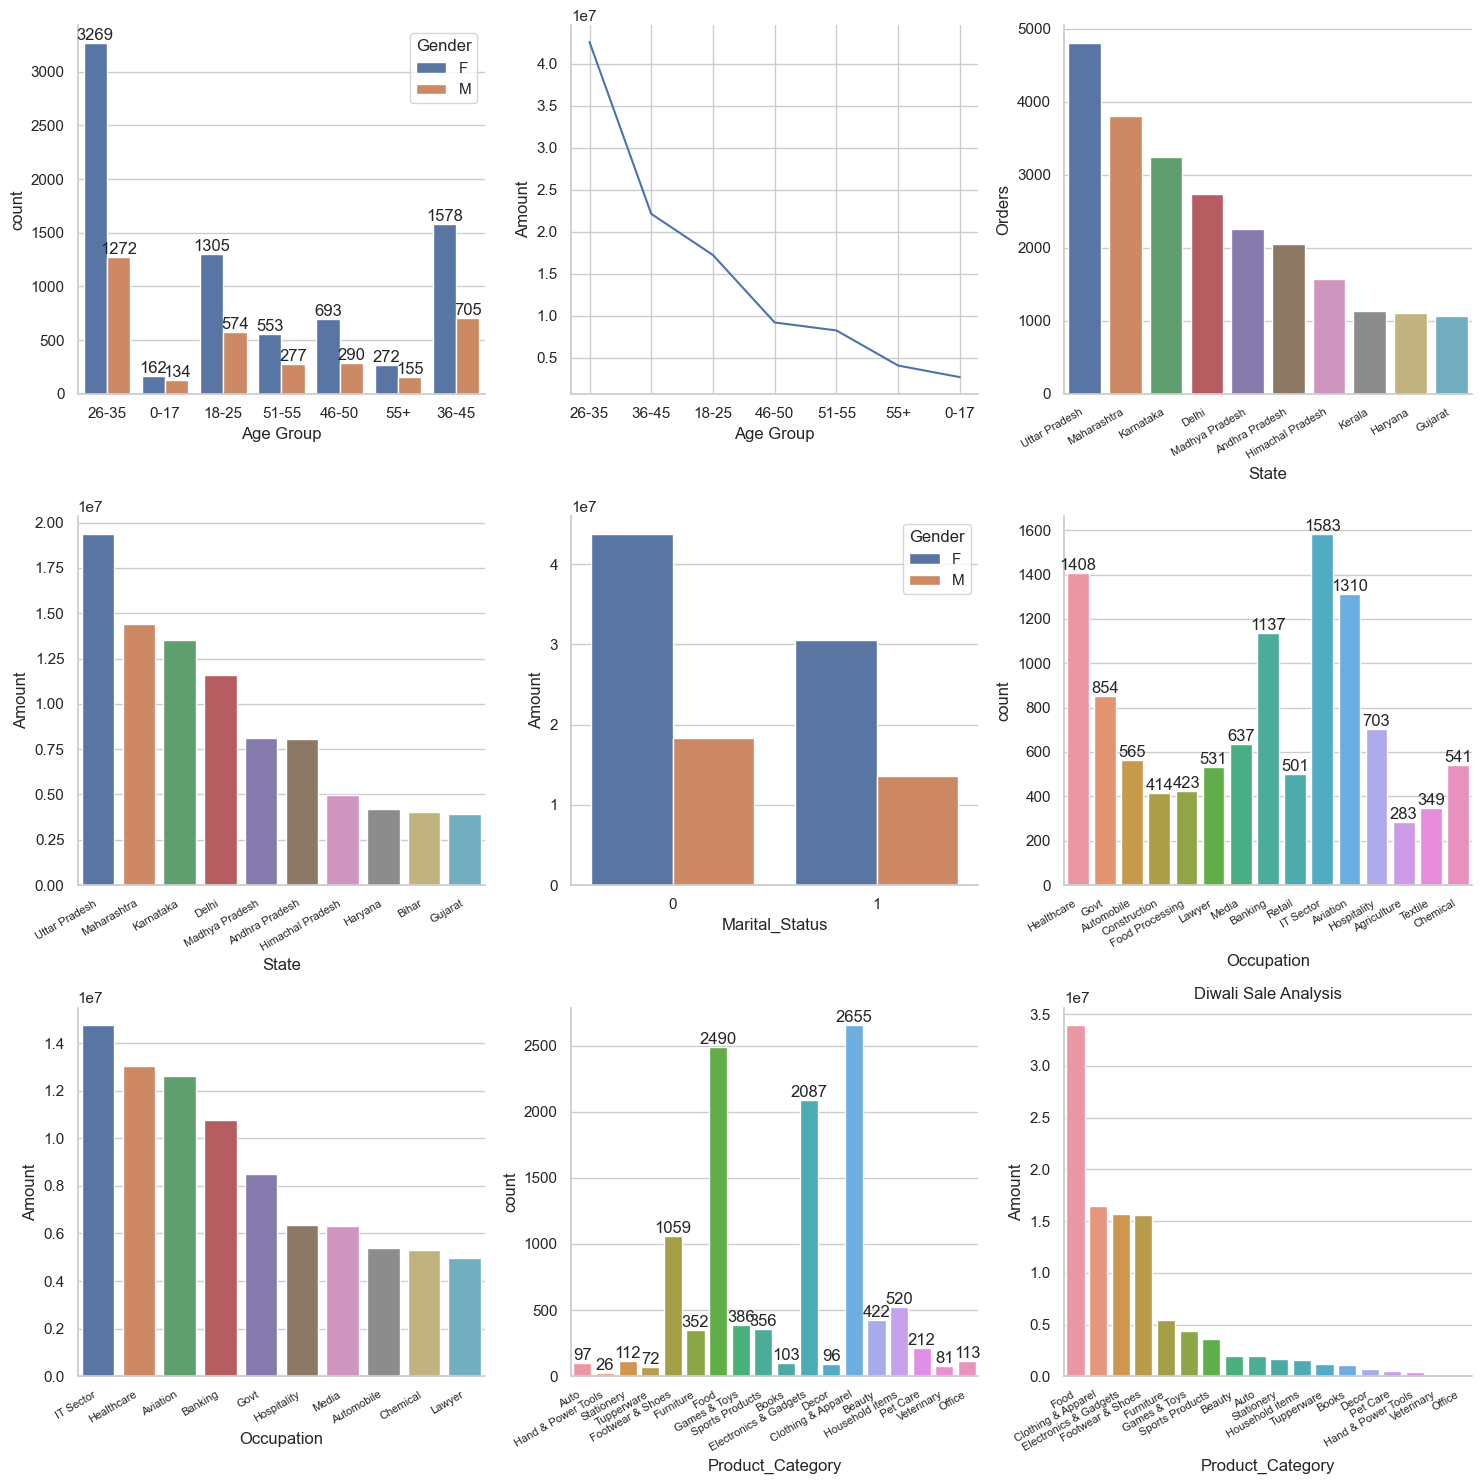

In [82]:
f,axes= plt.subplots(3,3, figsize=(15,15))
sns.set_style("whitegrid")
plt.title("Diwali Sale Analysis")

fig1=ax= sns.countplot(data=df, x='Age Group', hue='Gender',ax=axes[0,0])

for bars in ax.containers:
    ax.bar_label(bars)

fig2=sns.lineplot(x='Age Group', y='Amount' , data=sales_age,ax=axes[0,1])


fig3=sns.barplot(data=state_sales, x='State',y='Orders', ax=axes[0,2])
fig3.set_xticklabels(fig3.get_xticklabels(), rotation=30,fontsize=8,ha='right')


fig4=sns.barplot(data=state1_sales, x='State',y='Amount',ax=axes[1,0])
fig4.set_xticklabels(fig4.get_xticklabels(), rotation=30,fontsize=8,ha='right')


fig5=sns.barplot(data=sales2_state, x='Marital_Status', y='Amount', hue='Gender',ax=axes[1,1])

fig6=ax=sns.countplot(data=df, x='Occupation',ax=axes[1,2])
for bars in ax.containers:
    ax.bar_label(bars)
fig6.set_xticklabels(fig6.get_xticklabels(),rotation=30,fontsize=8,ha='right')

fig7=sns.barplot(data =sales_state2, x='Occupation',y='Amount',ax=axes[2,0])
fig7.set_xticklabels(fig7.get_xticklabels(),rotation=30,fontsize=8,ha='right')

fig8=ax=sns.countplot(data=df, x='Product_Category',ax=axes[2,1])
for bars in ax.containers:
    ax.bar_label(bars)
fig8.set_xticklabels(fig8.get_xticklabels(),rotation=30,fontsize=8,ha='right')


fig9=sns.barplot(data=sales_state3, x='Product_Category', y='Amount',ax=axes[2,2])
fig9.set_xticklabels(fig9.get_xticklabels(),rotation=30,fontsize=8,ha='right')

plt.tight_layout()
sns.despine()
plt.show()
